# 0. ETHZ Project

This project is associated with the lecture in the Computational Social Science Chair at the ETH Zurich: Data Science in Techno-Socio-Economic Systems

The idea is to analyse a dataset using different tools seen during the class.

To do that, we use MISP data, i.e. a data set composed by data retrieved on the February 8th 2022. From this dataset, we consider the attributes and we want to know how the MISP Platform is built, based on the inheritance principle seen in one of my previous contribution.

### 0.1 Import of libraries and Interface definition

In [1]:
from utils import *
from IPython.display import Latex

%matplotlib inline
%load_ext lab_black

### 0.2 Idea wthout NLP

In [2]:
myList = range(1, 50)
unorderedPairGenerator = ([x, y] for x in myList for y in myList if y > x)
i = 0

pairList = []
for pair in unorderedPairGenerator:
    pairList.append(pair)

pairSelected = np.random.randint(1, len(pairList), size=50)
print(pairSelected)

[1098  402  591  334  740  549  277  183  938  485   49   69  559  265
   80  673   87  456  660 1171  235  788  789  687  244  923 1163 1133
  231  673  501 1160   60  547  315  158 1106  183  491  690 1133 1138
  193  520  741  668  718 1102  308  490]


In [3]:
pairS = []
for ids, s in enumerate(pairSelected):
    pairS.append(pairList[s])
print(pairS)

[[37, 38], [10, 17], [15, 26], [8, 28], [19, 49], [14, 18], [7, 12], [4, 47], [27, 43], [12, 25], [2, 4], [2, 24], [14, 28], [6, 42], [2, 35], [17, 43], [2, 42], [11, 33], [17, 30], [46, 48], [6, 12], [21, 40], [21, 41], [18, 26], [6, 21], [27, 28], [44, 47], [40, 43], [6, 8], [17, 43], [12, 41], [43, 49], [2, 15], [14, 16], [8, 9], [4, 22], [37, 46], [4, 47], [12, 31], [18, 29], [40, 43], [40, 48], [5, 13], [13, 24], [20, 21], [17, 38], [19, 27], [37, 42], [7, 43], [12, 30]]


In [4]:
weight = np.random.random(len(pairS))
wList = zip(pairS, weight)
print(list(wList))

[([37, 38], 0.13918793039261623), ([10, 17], 0.5043194194766234), ([15, 26], 0.4390175863868805), ([8, 28], 0.3035916690689804), ([19, 49], 0.9142863442120344), ([14, 18], 0.8330832772292375), ([7, 12], 0.21373579303716073), ([4, 47], 0.9267960970446959), ([27, 43], 0.5215550151154993), ([12, 25], 0.6137159441764491), ([2, 4], 0.04260375693544527), ([2, 24], 0.8213431614916523), ([14, 28], 0.5012641858523473), ([6, 42], 0.18897640043116515), ([2, 35], 0.31784855427091896), ([17, 43], 0.377911586783225), ([2, 42], 0.9938409788651903), ([11, 33], 0.36457122561409816), ([17, 30], 0.35464626224848217), ([46, 48], 0.8504823057153761), ([6, 12], 0.199755718446614), ([21, 40], 0.4601251148427894), ([21, 41], 0.7511614263707218), ([18, 26], 0.5832797130089571), ([6, 21], 0.6314319335606873), ([27, 28], 0.603740019701463), ([44, 47], 0.5003795505978035), ([40, 43], 0.20553356937589518), ([6, 8], 0.9654834039422561), ([17, 43], 0.3340804790533205), ([12, 41], 0.030639280634244703), ([43, 49], 0.

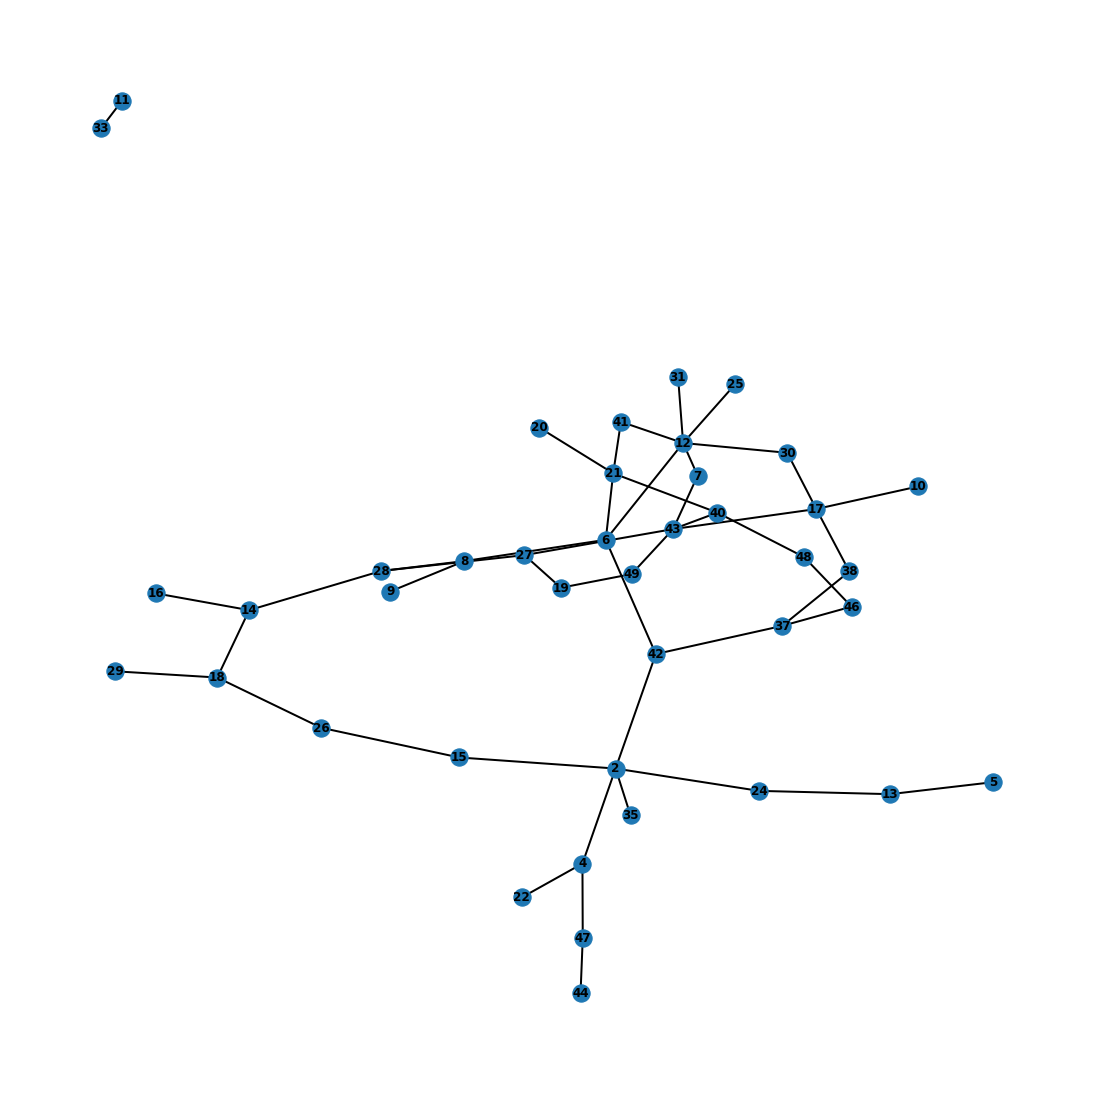

In [5]:
# Create a networkx graph object
my_graph1 = nx.Graph()

# Add edges to to the graph object
# Each tuple represents an edge between two nodes
my_graph1.add_edges_from(pairS)

# Draw the resulting graph
plt.figure(1, figsize=(15, 15))
nx.draw(
    my_graph1,
    with_labels=True,
    width=2.0,
    font_weight="bold",
    arrowstyle="-|>",
    arrowsize=10,
)

# Create a synthetic dataframe

The dimension of the dataframe corresponds to $\mathrm{dim}(NLP) = N_A \times N_A$
The matrix is a triangular matrix with a neglected diagonal

In [6]:
N_A = 40
NLP = np.zeros((N_A, N_A), dtype=float)
Edges = []
Weighted_Edges = []

for idi, i in enumerate(range(0, N_A)):
    for idj, j in enumerate(range(0, N_A)):
        if i < j:
            toss = bernoulli.rvs(0.2, size=1)[0]
            if toss == 1:
                inheritance_percentage = np.random.random(1)
                NLP[i, j] = inheritance_percentage
                Edges.append([i, j])
                Weighted_Edges.append(([i, j], inheritance_percentage))

df = pd.DataFrame(NLP)
print(type(df))
# print(Edges)

<class 'pandas.core.frame.DataFrame'>


### Transform a dataframe into a matix

In [7]:
NLP = df.to_numpy()
print(type(NLP))

print(NLP)

<class 'numpy.ndarray'>
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.26485616 0.         0.        ]
 [0.         0.         0.         ... 0.         0.62505533 0.70447599]
 ...
 [0.         0.         0.         ... 0.         0.18848551 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## Creation of the directed network

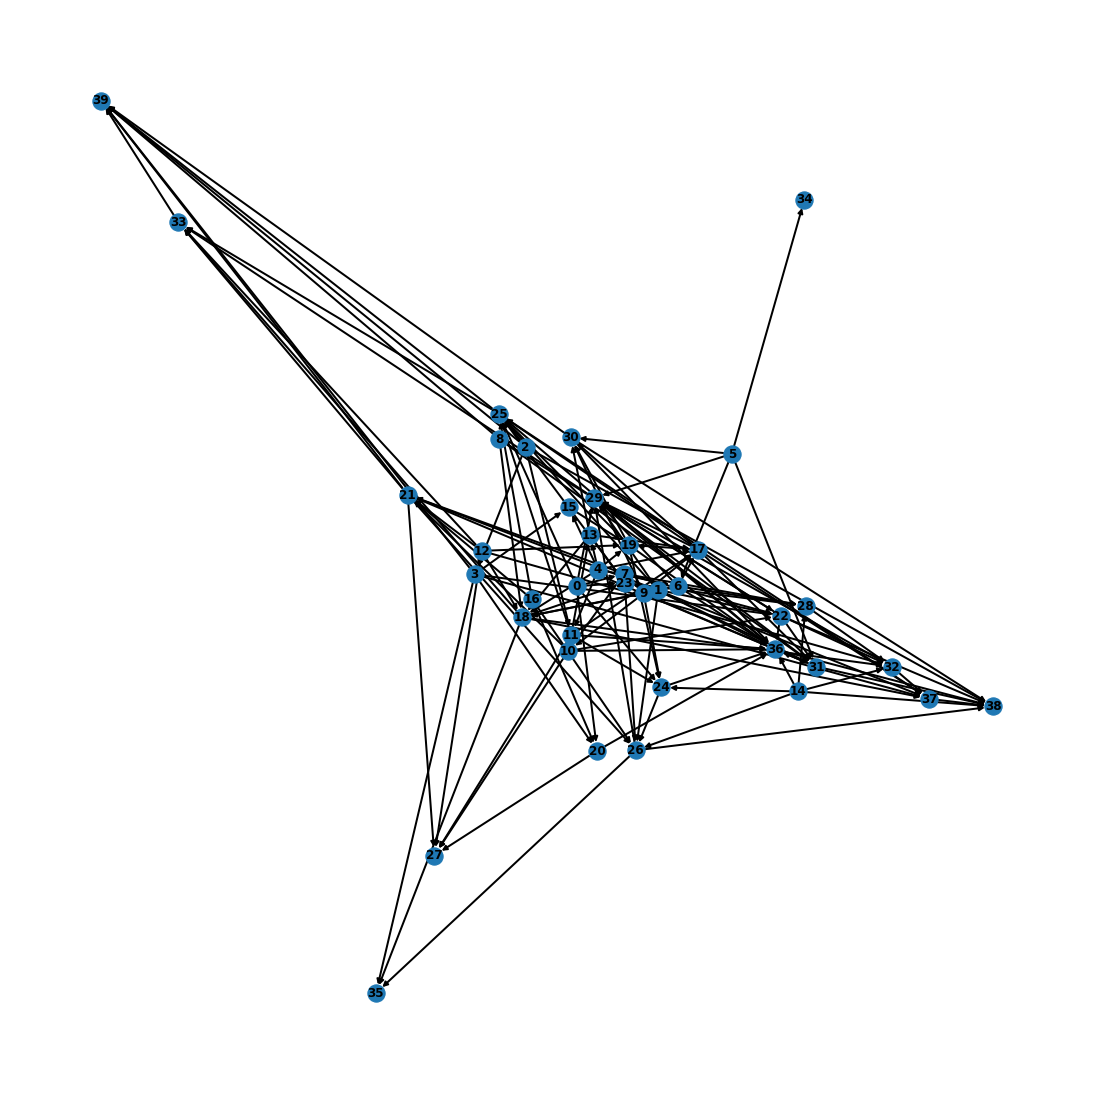

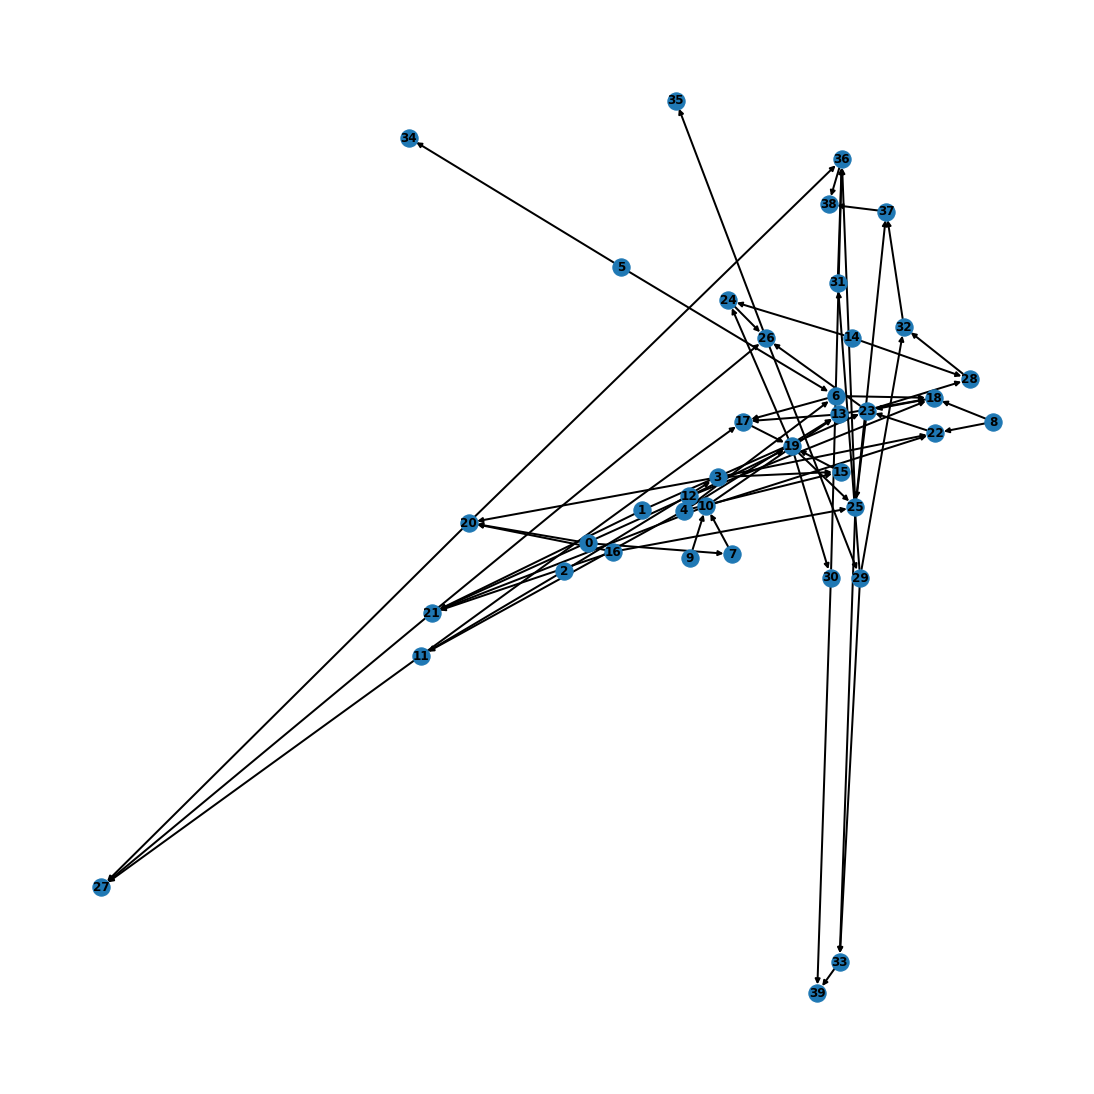

In [8]:
# Create a networkx graph object
my_graph = nx.DiGraph(directed=True)
# Add edges to to the graph object
# Each tuple represents an edge between two nodes
my_graph.add_edges_from(Edges)
my_graph_red = nx.transitive_reduction(my_graph)


# Draw the resulting graph
plt.figure(1, figsize=(15, 15))
nx.draw(
    my_graph,
    with_labels=True,
    width=2.0,
    font_weight="bold",
    arrowstyle="-|>",
    arrowsize=10,
)

plt.figure(2, figsize=(15, 15))
nx.draw(
    my_graph_red,
    with_labels=True,
    width=2.0,
    font_weight="bold",
    arrowstyle="-|>",
    arrowsize=10,
)

plt.show()

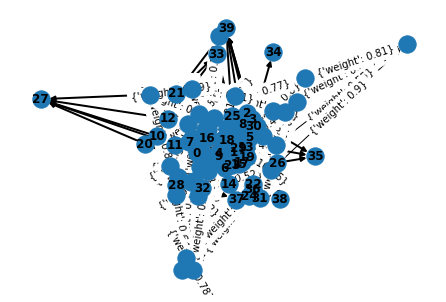

In [9]:
NLP = np.around(NLP, decimals=2)
G = nx.from_numpy_matrix(np.matrix(NLP), create_using=nx.DiGraph)
layout = nx.spring_layout(G)
nx.draw(G, layout)
nx.draw(
    G, with_labels=True, width=2.0, font_weight="bold", arrowstyle="-|>", arrowsize=10
)
nx.draw_networkx_edge_labels(G, pos=layout)
plt.show()

{0: 0.05128205128205128, 7: 0.05128205128205128, 20: 0.1282051282051282, 23: 0.15384615384615385, 24: 0.07692307692307693, 25: 0.15384615384615385, 29: 0.10256410256410256, 1: 0.05128205128205128, 21: 0.15384615384615385, 26: 0.1282051282051282, 31: 0.05128205128205128, 36: 0.1282051282051282, 37: 0.07692307692307693, 2: 0.05128205128205128, 3: 0.10256410256410256, 11: 0.10256410256410256, 38: 0.05128205128205128, 39: 0.05128205128205128, 15: 0.07692307692307693, 22: 0.10256410256410256, 35: 0.02564102564102564, 4: 0.10256410256410256, 6: 0.10256410256410256, 13: 0.10256410256410256, 17: 0.10256410256410256, 18: 0.1282051282051282, 19: 0.15384615384615385, 5: 0.05128205128205128, 30: 0.07692307692307693, 34: 0.02564102564102564, 28: 0.07692307692307693, 10: 0.1282051282051282, 8: 0.05128205128205128, 9: 0.02564102564102564, 27: 0.07692307692307693, 12: 0.07692307692307693, 32: 0.07692307692307693, 33: 0.07692307692307693, 14: 0.05128205128205128, 16: 0.07692307692307693}


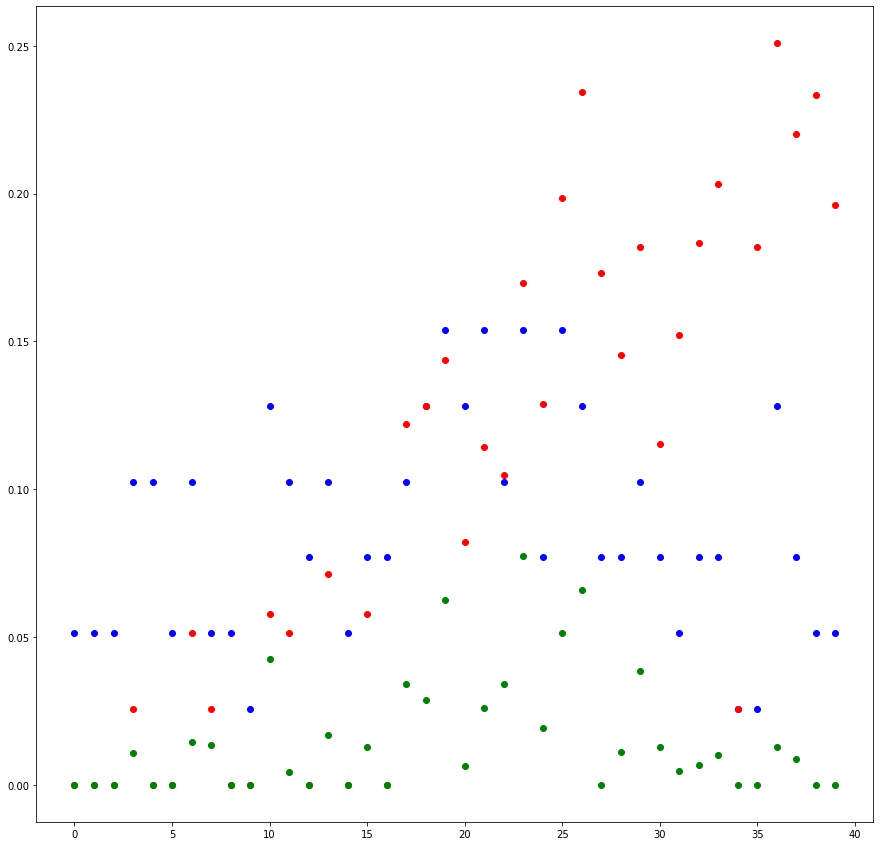

In [10]:
d_centrality = nx.degree_centrality(my_graph_red)
print(d_centrality)

c_centrality = nx.closeness_centrality(my_graph_red)

b_centrality = nx.betweenness_centrality(my_graph_red)

# f_centrality = nx.eigenvector_centrality(my_graph_red)

fig, ax1 = plt.subplots(1, 1, figsize=(15, 15))
ax1.scatter(d_centrality.keys(), d_centrality.values(), color="b")
ax1.scatter(c_centrality.keys(), c_centrality.values(), color="r")
ax1.scatter(b_centrality.keys(), b_centrality.values(), color="g")
# ax1.scatter(f_centrality.keys(), f_centrality.values(), color="black")

## Clustering

In [11]:
adj_Matrix = nx.adjacency_matrix(my_graph1)
# print(adj_Matrix)
inc_Matrix = nx.incidence_matrix(my_graph1)
# print(inc_Matrix)
lap_Matrix = nx.laplacian_matrix(my_graph1)
print(lap_Matrix)

  (0, 0)	3
  (0, 1)	-1
  (0, 22)	-1
  (0, 27)	-1
  (1, 0)	-1
  (1, 1)	2
  (1, 3)	-1
  (2, 2)	1
  (2, 3)	-1
  (3, 1)	-1
  (3, 2)	-1
  (3, 3)	4
  (3, 17)	-1
  (3, 26)	-1
  (4, 4)	2
  (4, 5)	-1
  (4, 19)	-1
  (5, 4)	-1
  (5, 5)	2
  (5, 11)	-1
  (6, 6)	3
  (6, 7)	-1
  (6, 21)	-1
  (6, 34)	-1
  (7, 6)	-1
  :	:
  (30, 28)	-1
  (30, 29)	-1
  (30, 30)	3
  (31, 13)	-1
  (31, 29)	-1
  (31, 31)	2
  (32, 15)	-1
  (32, 32)	1
  (33, 10)	-1
  (33, 33)	1
  (34, 6)	-1
  (34, 34)	1
  (35, 14)	-1
  (35, 35)	1
  (36, 13)	-1
  (36, 36)	1
  (37, 11)	-1
  (37, 37)	1
  (38, 38)	1
  (38, 39)	-1
  (39, 20)	-1
  (39, 38)	-1
  (39, 39)	2
  (40, 29)	-1
  (40, 40)	1


/tmp/ipykernel_8695/3354675219.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_Matrix = nx.adjacency_matrix(my_graph1)
/tmp/ipykernel_8695/3354675219.py:3: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  inc_Matrix = nx.incidence_matrix(my_graph1)
<class 'networkx.utils.decorators.argmap'> compilation 24:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


# Literature and Ideas
- https://towardsdatascience.com/spectral-graph-clustering-and-optimal-number-of-clusters-estimation-32704189afbe
- https://medium.com/analytics-vidhya/a-gentle-introduction-to-networkx-with-python-21c29419d28a
- https://towardsdatascience.com/graph-visualisation-basics-with-python-part-ii-directed-graph-with-networkx-5c1cd5564daa
- https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.dag.transitive_reduction.html
- https://stackoverflow.com/questions/56597840/drawing-weighted-graph-from-adjacency-matrix-with-edge-labels
- https://networkx.org/documentation/stable/reference/algorithms/dag.html

In [12]:
data_folder = "/home/gillard/Bureau/MISP_Analysis/Back-up/WEIS2022"
attributes = pd.read_csv(f"{data_folder}/Attributes.csv")
attributes = attributes.sort_values(by=["Timestamp"], ascending=True)
attributes = attributes.reset_index(drop=True)
attributes.describe()
attributes = attributes.dropna(subset=["Value", "Comment"], how="all")
attributes["Value"] = attributes["Value"].str.lower()
Value_ID = attributes["Value"].astype("category").cat.codes
attributes["Value ID"] = Value_ID

/home/gillard/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (0,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


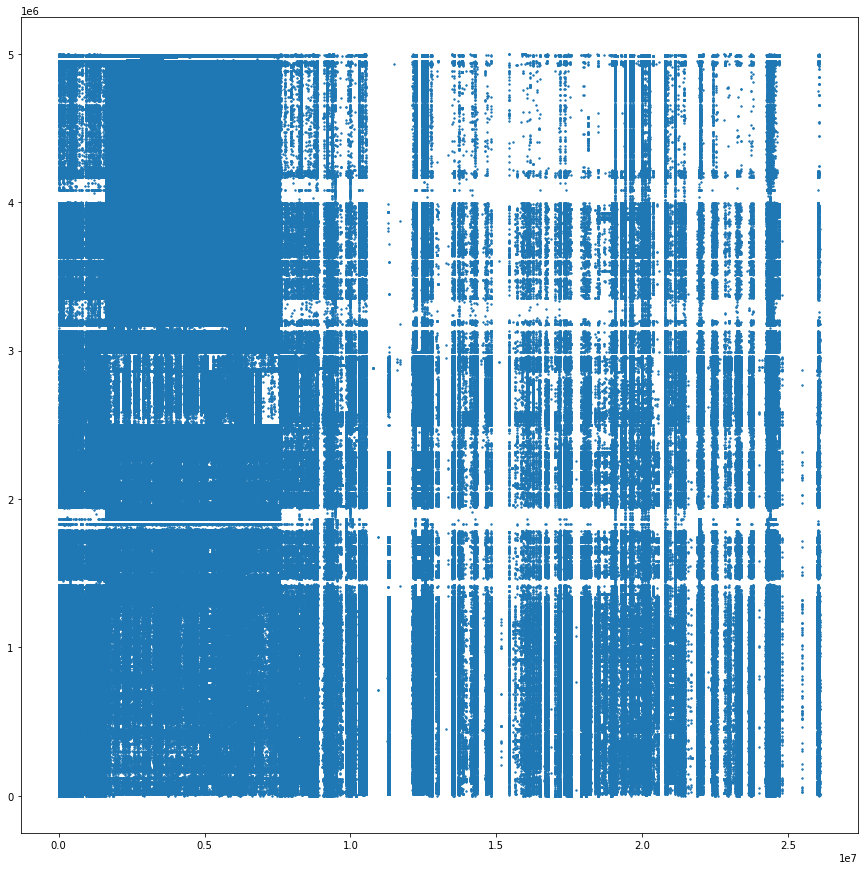

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 15))
ax1.scatter(attributes["Attribute ID"], attributes["Value ID"], s=2)

In [27]:
Count0 = attributes["Value ID"].value_counts()[
    attributes["Value ID"].value_counts() > 0
]
Count1 = attributes["Value ID"].value_counts()[
    attributes["Value ID"].value_counts() > 1
]
SimAttr = attributes["Value ID"].value_counts().keys().tolist()
# SimAttrOcc = attributes["Value ID"].value_counts().tolist()
# print(Count1.keys())
Count0 = Count0[(Count0 > 10) & (Count0 < 100)]
# print(Count0)
# print(attributes[attributes["Value ID"] == 3985396])

test_attr = attributes[attributes["Value ID"] == 1770253]
# print(test_attr)

test_attr["Delta"] = test_attr["Timestamp"] - min(test_attr["Timestamp"])

# print(test_attr["Delta"])


# Inh_SimAttrix = []
# for idi, i in enumerate(SimAttr):
#     InhAttr = attributes[attributes["Value ID"] == i]

/tmp/ipykernel_8695/2230714726.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_attr["Delta"] = test_attr["Timestamp"] - min(test_attr["Timestamp"])


{'a': 1}
{'a': 0.0}
{'a': 0.0}
{'a': 1.0, 'b': 1.0}
{'a': 0.0, 'b': 1.0}
{'a': 0.0, 'b': 0.0}
{'a': 1.0, 'b': 1.0, 'c': 1.0}
{'a': 0.0, 'b': 0.5, 'c': 1.0}
{'a': 0.0, 'b': 0.0, 'c': 0.0}


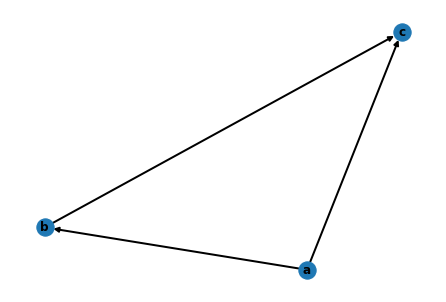

In [25]:
# G = nx.DiGraph()
# G.add_node("a", timestamp="0")
# print(nx.degree_centrality(G))
# print(nx.closeness_centrality(G))
# print(nx.betweenness_centrality(G))
# G.add_node("b", timestamp="283")
# G.add_edge("a", "b", timestamp="283")
# print(nx.degree_centrality(G))
# print(nx.closeness_centrality(G))
# print(nx.betweenness_centrality(G))
# G.add_node("c", timestamp="1000")
# G.add_edge("a", "c", timestamp="1000")
# G.add_edge("b", "c", timestamp="1000")
# print(nx.degree_centrality(G))
# print(nx.closeness_centrality(G))
# print(nx.betweenness_centrality(G))

# nx.draw(
#     G,
#     with_labels=True,
#     width=2.0,
#     font_weight="bold",
#     arrowstyle="-|>",
#     arrowsize=10,
# )

In [16]:
# graph = nx.Graph()
# num_plots = 50
# for node_number in range(num_plots):
#     graph.add_node(node_number, Position=(random.randrange(0, 100), random.randrange(0, 100)))
#     graph.add_edge(node_number, random.choice(list(graph.nodes())))
#     nx.draw(graph, pos=nx.get_node_attributes(graph,'Position'))
#     plt.pause(0.5)

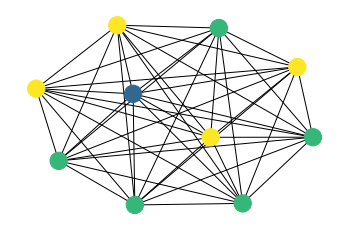

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation

# number of nodes
size = 10

# generate graph
G = nx.complete_graph(size)

# generating input frames here, since my data is too big
# its important that the frames go as input and is not generated
# on the fly
frame = np.random.randint(
    0, 5, (size, size)
)  # random ndarray between 0 and 5, length and number of frames = number of nodes in the graph

# draw the topology of the graph, what changes during animation
# is just the color
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos)
plt.axis("off")

# pass frames to funcanimation via update function
# this is where I get stuck, since I cannot break
# out of the loop, neither can I read every array of
# the ndarray without looping over it explicitly
def update(i):
    # for i in range(len(frame)):
    # instead of giving frame as input, if I randomly generate it, then it works
    nc = frame[i]  # np.random.randint(2, size=200)
    nodes.set_array(nc)
    return (nodes,)


# output animation; its important I save it
fig = plt.gcf()
ani = FuncAnimation(fig, update, interval=50, frames=range(size), blit=True)
ani.save("crap.gif", writer="imagemagick", savefig_kwargs={"facecolor": "white"}, fps=1)